## Analysis of the Dimensions Database

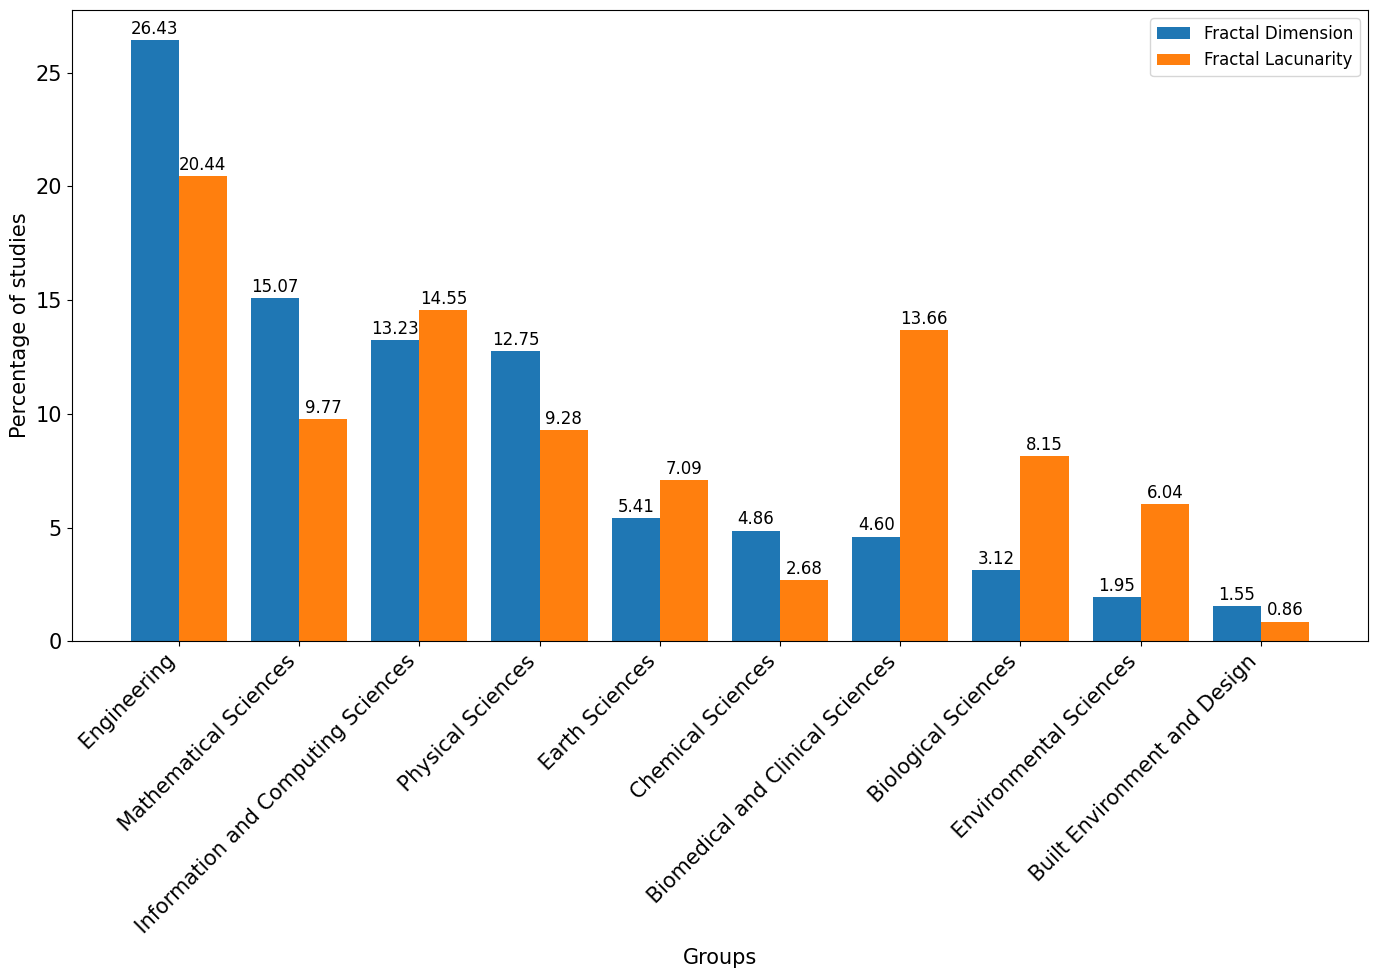

In [46]:
# -*- coding: utf-8 -*-
"""
Fractal Dimension and Lacunarity Analysis
Author: Rone Nascimento da Silva
Description:
    Script to load fractal dimension and lacunarity data,
    preprocess columns, calculate percentages, organize tables,
    and generate comparative charts.
"""

# ==========================================================
# Importing Libraries
# ==========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ==========================================================
# Loading Data
# ==========================================================
url_frac_dim_dimen = "https://raw.githubusercontent.com/nascimento-fisica/review_fd_fl/refs/heads/main/Fractal%20Dimension.csv"
url_frac_lac_dimen = "https://raw.githubusercontent.com/nascimento-fisica/review_fd_fl/refs/heads/main/fractal_lacunarity.csv"

frac_dim_dimen = pd.read_csv(url_frac_dim_dimen, delimiter=';')
frac_lac_dimen = pd.read_csv(url_frac_lac_dimen, delimiter=';')

# ==========================================================
# Preprocessing
# ==========================================================
# Remove the first 2 characters from the 'Category' column
frac_dim_dimen['Category'] = frac_dim_dimen['Category'].str[2:]
frac_lac_dimen['Category'] = frac_lac_dimen['Category'].str[2:]

# Rename columns for simplification
frac_dim_dimen = frac_dim_dimen.rename(columns={"Fields of Research (ANZSRC 2020)": "Fields of Research"})
frac_lac_dimen = frac_lac_dimen.rename(columns={"Fields of Research (ANZSRC 2020)": "Fields of Research"})


# ==========================================================
# Percentage Calculation
# ==========================================================
# Fractal Dimension
tot_frac_dim_dimen = frac_dim_dimen['Fields of Research'].sum()
frac_dim_dimen['Percentage_dim'] = (frac_dim_dimen['Fields of Research'] / tot_frac_dim_dimen) * 100
frac_dim_dimen['Percentage_dim'] = frac_dim_dimen['Percentage_dim'].round(3)

# Lacunarity
tot_frac_lac_dimen = frac_lac_dimen['Fields of Research'].sum()
frac_lac_dimen['Percentage_lac'] = (frac_lac_dimen['Fields of Research'] / tot_frac_lac_dimen) * 100
frac_lac_dimen['Percentage_lac'] = frac_lac_dimen['Percentage_lac'].round(3)


# ==========================================================
# Selecting Top Areas
# ==========================================================
# Top 20 by fractal dimension
frac_dim_dimen_sorted = frac_dim_dimen.sort_values(by='Fields of Research', ascending=False)
top_frac_dim_dimen = frac_dim_dimen_sorted.head(20)

# Select the same areas in the lacunarity table
areas = top_frac_dim_dimen['Category'].tolist()
areas_lac_dimen = frac_lac_dimen[frac_lac_dimen['Category'].isin(areas)]

# Merge both tables
tabela_ordenada_dimen = top_frac_dim_dimen.merge(areas_lac_dimen, on='Category')
tabela_ordenada_mes_dimen = tabela_ordenada_dimen.sort_values(by='Percentage_dim', ascending=False)
top_frac_dim_mes_dimen = tabela_ordenada_mes_dimen.head(20)


# ==========================================================
# Comparative Chart
# ==========================================================

plt.rcParams.update({'font.size': 14})

# Data for the chart (top 10)
col_dim_frac_grupo = top_frac_dim_mes_dimen['Category'].tolist()[:10]
col_dim_frac_dimen = top_frac_dim_mes_dimen['Percentage_dim'].tolist()[:10]
col_lacunaridade_dimen = top_frac_dim_mes_dimen['Percentage_lac'].tolist()[:10]
col_dim_frac_grupo_axis = np.arange(len(col_dim_frac_grupo))

# Create figure
plt.figure(figsize=(14, 10))

# Bars
bars1 = plt.bar(col_dim_frac_grupo_axis - 0.2, col_dim_frac_dimen, 0.4, label='Fractal Dimension')
bars2 = plt.bar(col_dim_frac_grupo_axis + 0.2, col_lacunaridade_dimen, 0.4, label='Fractal Lacunarity')

# Adding values above the bars
for i, val in enumerate(col_dim_frac_dimen):
    plt.text(col_dim_frac_grupo_axis[i] - 0.2, val + 0.1, f'{val:.2f}',
             ha='center', va='bottom', fontsize=12)

for i, val in enumerate(col_lacunaridade_dimen):
    plt.text(col_dim_frac_grupo_axis[i] + 0.2, val + 0.1, f'{val:.2f}',
             ha='center', va='bottom', fontsize=12)

# Axes and labels
plt.xticks(col_dim_frac_grupo_axis, col_dim_frac_grupo, rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Groups", fontsize=15)
plt.ylabel("Percentage of studies", fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
